In [1]:
import pandas as pd
import numpy as np

In [2]:
train_1=pd.read_csv(r'C:\Users\stat_17\Desktop\svt\w_train_1_group.csv')

In [3]:
a=train_1[train_1['target']==1]

In [4]:
b=train_1[train_1['target']==0]

In [5]:
lis = [(a['day_sum_rain']<=100), (a['day_sum_rain']>100)]
choicelist = [0,1]
a['ch']=np.select(lis, choicelist)
lis_2 = [(b['day_sum_rain']<=250), (b['day_sum_rain']>250)]
choicelist = [1,0]
b['ch']=np.select(lis_2, choicelist)

<ipython-input-5-8867a8db1cb4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['ch']=np.select(lis, choicelist)
<ipython-input-5-8867a8db1cb4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['ch']=np.select(lis_2, choicelist)


In [6]:
train_11=a[a['ch']==1]
train_12=b[b['ch']==1]

In [7]:
train_1=pd.concat([train_11, train_12])

In [8]:
train_1=train_1.drop(['ch'], axis=1)

In [9]:
train_1['TPTP'] = train_1['TPGRP_TPCD'].astype(str)  + train_1['PRDN_FOM_C'].astype(str)  

In [10]:
train_1['target_1'] = train_1['target']
train_1=train_1.drop(['date', 'umd', 'target'], axis=1)

In [11]:
train_1_array=np.array(train_1)

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_1_array[:, 64]=le.fit_transform(train_1_array[:,64])

In [13]:
train_1_array[:, 6]=le.fit_transform(train_1_array[:,6])

In [14]:
train_1= pd.DataFrame(train_1_array, columns=train_1.columns)

In [15]:
train_1=train_1.astype(float)

In [16]:
test_1=pd.read_csv(r'C:\Users\stat_17\Desktop\svt\w_test_1_group.csv')

In [17]:
test_1['TPTP'] = test_1['TPGRP_TPCD'].astype(str)  + test_1['PRDN_FOM_C'].astype(str) 

In [18]:
test_1=test_1.sort_values(by=['index'])

In [19]:
test_id_1=test_1[['index', 'date', 'umd']]

In [20]:
test_1=test_1.drop(['index', 'date', 'umd'], axis=1)
test_1_array=np.array(test_1)

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test_1_array[:, 64]=le.fit_transform(test_1_array[:,64])

In [22]:
test_1_array[:, 6]=le.fit_transform(test_1_array[:,6])

In [23]:
test_1= pd.DataFrame(test_1_array, columns=test_1.columns)

In [24]:
test_1=test_1.astype(float)

In [25]:
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

X_features = train_1.iloc[:, :-1]
y_label = train_1.iloc[:, -1]

In [26]:
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')

In [27]:
# shuffle1
import sklearn
x_shuffled1 = sklearn.utils.shuffle(X_features, random_state=2021)
y_shuffled1 =sklearn.utils.shuffle(y_label, random_state=2021)
X_train1, X_test1, y_train1, y_test1=train_test_split(x_shuffled1, y_shuffled1, test_size=0.3, random_state=2021, stratify=y_label)
print(X_train1.shape, X_test1.shape)

(4137, 65) (1774, 65)


In [28]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled1, y_resampled1 = smote_nc.fit_resample(X_train1, y_train1)

In [29]:
# shuffle2
import sklearn
x_shuffled2 = sklearn.utils.shuffle(X_features, random_state=2022)
y_shuffled2 =sklearn.utils.shuffle(y_label, random_state=2022)
X_train2, X_test2, y_train2, y_test2=train_test_split(x_shuffled2, y_shuffled2, test_size=0.3, random_state=2022, stratify=y_label)
print(X_train2.shape, X_test2.shape)

(4137, 65) (1774, 65)


In [30]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled2, y_resampled2 = smote_nc.fit_resample(X_train2, y_train2)

In [31]:
# shuffle3
import sklearn
x_shuffled3 = sklearn.utils.shuffle(X_features, random_state=2023)
y_shuffled3 =sklearn.utils.shuffle(y_label, random_state=2023)
X_train3, X_test3, y_train3, y_test3=train_test_split(x_shuffled3, y_shuffled3, test_size=0.3, random_state=2023, stratify=y_label)
print(X_train3.shape, X_test3.shape)

(4137, 65) (1774, 65)


In [32]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled3, y_resampled3 = smote_nc.fit_resample(X_train3, y_train3)

In [33]:
# shuffle4
import sklearn
x_shuffled4 = sklearn.utils.shuffle(X_features, random_state=2024)
y_shuffled4 =sklearn.utils.shuffle(y_label, random_state=2024)
X_train4, X_test4, y_train4, y_test4=train_test_split(x_shuffled4, y_shuffled4, test_size=0.3, random_state=2024, stratify=y_label)
print(X_train4.shape, X_test4.shape)

(4137, 65) (1774, 65)


In [34]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled4, y_resampled4 = smote_nc.fit_resample(X_train4, y_train4)

In [35]:
# shuffle5
import sklearn
x_shuffled5 = sklearn.utils.shuffle(X_features, random_state=2025)
y_shuffled5 =sklearn.utils.shuffle(y_label, random_state=2025)
X_train5, X_test5, y_train5, y_test5=train_test_split(x_shuffled5, y_shuffled5, test_size=0.3, random_state=2025, stratify=y_label)
print(X_train5.shape, X_test5.shape)

(4137, 65) (1774, 65)


In [36]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled5, y_resampled5 = smote_nc.fit_resample(X_train5, y_train5)

In [37]:
# shuffle6
import sklearn
x_shuffled6 = sklearn.utils.shuffle(X_features, random_state=2026)
y_shuffled6 =sklearn.utils.shuffle(y_label, random_state=2026)
X_train6, X_test6, y_train6, y_test6=train_test_split(x_shuffled6, y_shuffled6, test_size=0.3, random_state=2026, stratify=y_label)
print(X_train6.shape, X_test6.shape)

(4137, 65) (1774, 65)


In [38]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled6, y_resampled6 = smote_nc.fit_resample(X_train6, y_train6)

In [39]:
# shuffle7
import sklearn
x_shuffled7 = sklearn.utils.shuffle(X_features, random_state=2027)
y_shuffled7 =sklearn.utils.shuffle(y_label, random_state=2027)
X_train7, X_test7, y_train7, y_test7=train_test_split(x_shuffled7, y_shuffled7, test_size=0.3, random_state=2027, stratify=y_label)
print(X_train7.shape, X_test7.shape)

(4137, 65) (1774, 65)


In [40]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled7, y_resampled7 = smote_nc.fit_resample(X_train7, y_train7)

In [41]:
# shuffle8
import sklearn
x_shuffled8 = sklearn.utils.shuffle(X_features, random_state=2028)
y_shuffled8 =sklearn.utils.shuffle(y_label, random_state=2028)
X_train8, X_test8, y_train8, y_test8=train_test_split(x_shuffled8, y_shuffled8, test_size=0.3, random_state=2028, stratify=y_label)
print(X_train8.shape, X_test8.shape)

(4137, 65) (1774, 65)


In [42]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled8, y_resampled8 = smote_nc.fit_resample(X_train8, y_train8)

In [43]:
# shuffle9
import sklearn
x_shuffled9 = sklearn.utils.shuffle(X_features, random_state=2029)
y_shuffled9 =sklearn.utils.shuffle(y_label, random_state=2029)
X_train9, X_test9, y_train9, y_test9=train_test_split(x_shuffled9, y_shuffled9, test_size=0.3, random_state=2029, stratify=y_label)
print(X_train9.shape, X_test9.shape)

(4137, 65) (1774, 65)


In [44]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled9, y_resampled9 = smote_nc.fit_resample(X_train9, y_train9)

In [45]:
# shuffle10
import sklearn
x_shuffled10 = sklearn.utils.shuffle(X_features, random_state=2030)
y_shuffled10 =sklearn.utils.shuffle(y_label, random_state=2030)
X_train10, X_test10, y_train10, y_test10=train_test_split(x_shuffled10, y_shuffled10, test_size=0.3, random_state=2030, stratify=y_label)
print(X_train10.shape, X_test10.shape)

(4137, 65) (1774, 65)


In [46]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled10, y_resampled10 = smote_nc.fit_resample(X_train10, y_train10)

In [47]:
from bayes_opt import BayesianOptimization

In [48]:
# LIGHTGBM 베이지안 최적화
def modelFitter(colsampleByTree, subsample,maxDepth, num_leaves,learning_rates,min_child_weights):

    model = LGBMClassifier(learning_rate=learning_rate, n_estimators=1000, max_depth=maxDepth.astype("int32"), subsample=subsample, colsample_bytree=colsampleByTree,num_leaves=num_leaves.astype("int32"),min_child_weight=min_child_weight)

    evalSet  = [(X_test1, y_test1)]
    model.fit(X_resampled1, y_resampled1, eval_metric="binary_logloss", eval_set=evalSet, early_stopping_rounds=50, verbose=False)

    bestScore = model.best_score_[list(model.best_score_.keys())[0]]['binary_logloss']

    return -bestScore

# Bounded region of parameter space
pbounds = {'colsampleByTree': (0.5,1.0), 'subsample': (0.8,1.0), 'maxDepth': (3,10), 'num_leaves': (24, 45),'learning_rate':(0.01,0.3),'min_child_weight':(5,9)}

optimizer = BayesianOptimization(
    f=modelFitter,
    pbounds=pbounds,
    random_state=1)

optimizer.maximize(init_points=5,n_iter=5) 

|   iter    |  target   | colsam... | learni... | maxDepth  | min_ch... | num_le... | subsample |
-------------------------------------------------------------------------------------------------
|  1        | -0.0766   |  0.7085   |  0.2189   |  3.001    |  6.209    |  27.08    |  0.8185   |
|  2        | -0.07694  |  0.5931   |  0.1102   |  5.777    |  7.155    |  32.8     |  0.937    |
|  3        | -0.08011  |  0.6022   |  0.2647   |  3.192    |  7.682    |  32.76    |  0.9117   |
|  4        | -0.07498  |  0.5702   |  0.06745  |  8.605    |  8.873    |  30.58    |  0.9385   |
|  5        | -0.08201  |  0.9382   |  0.2694   |  3.595    |  5.156    |  27.57    |  0.9756   |
|  6        | -0.07937  |  0.7807   |  0.1189   |  6.352    |  7.245    |  26.89    |  0.9289   |
|  7        | -0.07847  |  0.7989   |  0.1023   |  7.641    |  6.794    |  27.62    |  0.8606   |
|  8        | -0.08388  |  0.5725   |  0.2854   |  3.032    |  6.327    |  27.18    |  0.9822   |
|  9        | -0.075

[1]	valid_0's binary_logloss: 0.169229
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.1639
[3]	valid_0's binary_logloss: 0.159226
[4]	valid_0's binary_logloss: 0.154646
[5]	valid_0's binary_logloss: 0.15015
[6]	valid_0's binary_logloss: 0.1458
[7]	valid_0's binary_logloss: 0.141697
[8]	valid_0's binary_logloss: 0.138181
[9]	valid_0's binary_logloss: 0.135094
[10]	valid_0's binary_logloss: 0.13224
[11]	valid_0's binary_logloss: 0.129176
[12]	valid_0's binary_logloss: 0.126702
[13]	valid_0's binary_logloss: 0.123829
[14]	valid_0's binary_logloss: 0.121158
[15]	valid_0's binary_logloss: 0.119599
[16]	valid_0's binary_logloss: 0.116892
[17]	valid_0's binary_logloss: 0.114356
[18]	valid_0's binary_logloss: 0.111892
[19]	valid_0's binary_logloss: 0.109416
[20]	valid_0's binary_logloss: 0.107183
[21]	valid_0's binary_logloss: 0.105117
[22]	valid_0's binary_logloss: 0.103319
[23]	valid_0's binary_logloss: 0.10162
[24]	valid_0's binary_logloss: 0.1

[207]	valid_0's binary_logloss: 0.0667799
[208]	valid_0's binary_logloss: 0.0667469
[209]	valid_0's binary_logloss: 0.0667486
[210]	valid_0's binary_logloss: 0.0667944
[211]	valid_0's binary_logloss: 0.0667118
[212]	valid_0's binary_logloss: 0.0666979
[213]	valid_0's binary_logloss: 0.0666031
[214]	valid_0's binary_logloss: 0.0665149
[215]	valid_0's binary_logloss: 0.0665704
[216]	valid_0's binary_logloss: 0.0665558
[217]	valid_0's binary_logloss: 0.0666265
[218]	valid_0's binary_logloss: 0.0664766
[219]	valid_0's binary_logloss: 0.0665418
[220]	valid_0's binary_logloss: 0.0665169
[221]	valid_0's binary_logloss: 0.0664689
[222]	valid_0's binary_logloss: 0.0664844
[223]	valid_0's binary_logloss: 0.0664275
[224]	valid_0's binary_logloss: 0.0665
[225]	valid_0's binary_logloss: 0.0664182
[226]	valid_0's binary_logloss: 0.0663411
[227]	valid_0's binary_logloss: 0.0664161
[228]	valid_0's binary_logloss: 0.0664891
[229]	valid_0's binary_logloss: 0.0664611
[230]	valid_0's binary_logloss: 0.066

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

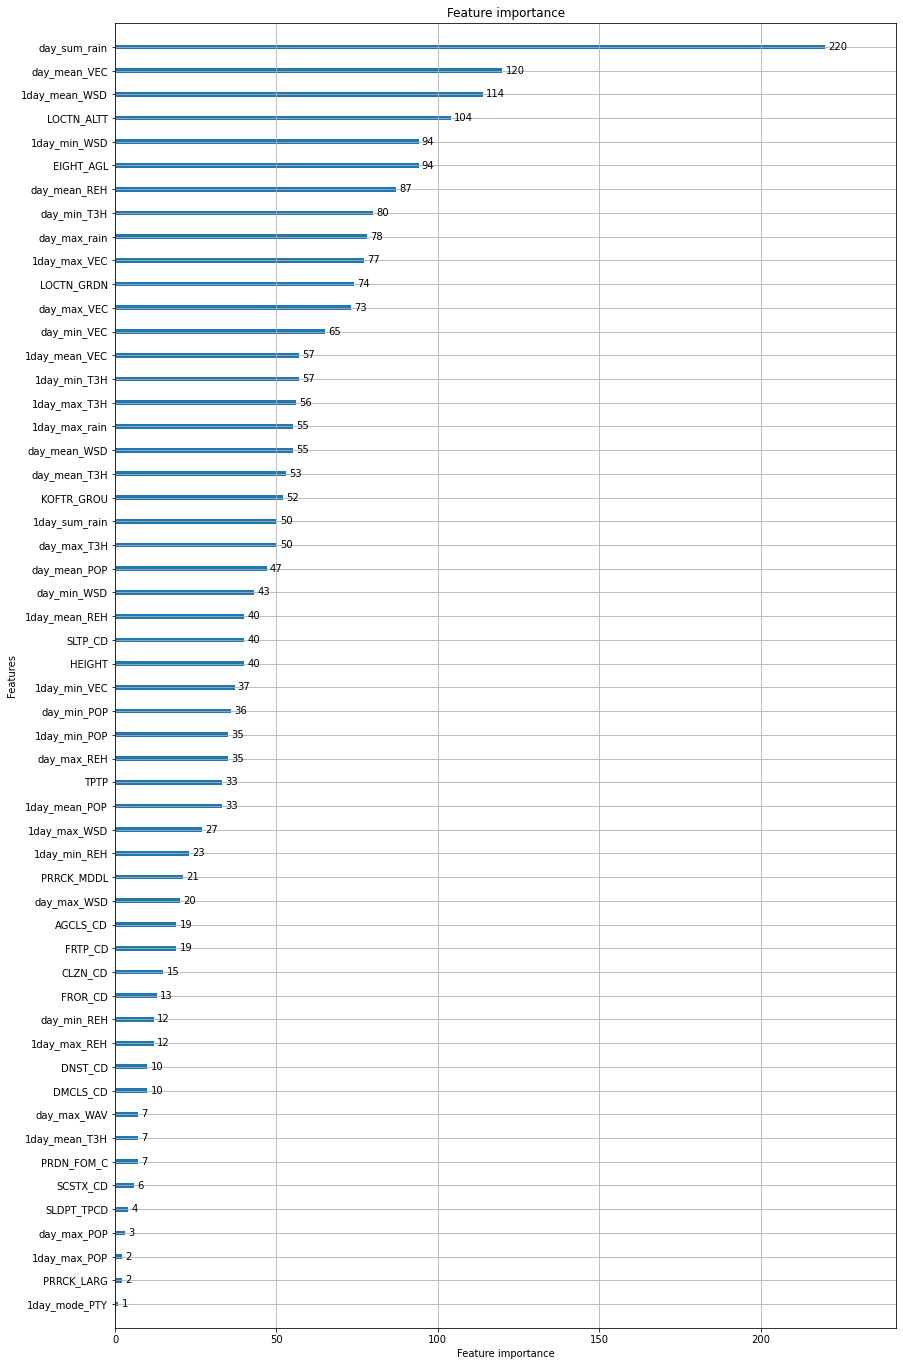

In [49]:
# LIGHTGBM  학습
                       
lgbm1 = LGBMClassifier(n_estimators=300, learning_rate=0.03744, num_leaves=24, sumbsample=0.8908 , colsample_bytree=0.9584, max_depth=10,
                             min_child_weight=8.788)
evals = [(X_test1, y_test1)]
lgbm1.fit(X_train1, y_train1, early_stopping_rounds=100, eval_metric='binary_logloss', eval_set=evals, verbose=True)

from lightgbm import plot_importance #  변수 중요도
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(14, 24))
plot_importance(lgbm1, ax=ax)

In [50]:
# LIGHTGBM 베이지안 최적화
def modelFitter(colsampleByTree, subsample,maxDepth, num_leaves,learning_rate,min_child_weight):

    model = LGBMClassifier(learning_rate=learning_rate, n_estimators=1000, max_depth=maxDepth.astype("int32"), subsample=subsample, colsample_bytree=colsampleByTree,num_leaves=num_leaves.astype("int32"),min_child_weight=min_child_weight)

    evalSet  = [(X_test2, y_test2)]
    model.fit(X_resampled2, y_resampled2, eval_metric="binary_logloss", eval_set=evalSet, early_stopping_rounds=50, verbose=False)

    bestScore = model.best_score_[list(model.best_score_.keys())[0]]['binary_logloss']

    return -bestScore

# Bounded region of parameter space
pbounds = {'colsampleByTree': (0.5,1.0), 'subsample': (0.8,1.0), 'maxDepth': (3,10), 'num_leaves': (24, 45),'learning_rate':(0.01,0.3),'min_child_weight':(5,9)}

optimizer = BayesianOptimization(
    f=modelFitter,
    pbounds=pbounds,
    random_state=1)

optimizer.maximize(init_points=5,n_iter=5) 

|   iter    |  target   | colsam... | learni... | maxDepth  | min_ch... | num_le... | subsample |
-------------------------------------------------------------------------------------------------
|  1        | -0.07801  |  0.7085   |  0.2189   |  3.001    |  6.209    |  27.08    |  0.8185   |
|  2        | -0.07581  |  0.5931   |  0.1102   |  5.777    |  7.155    |  32.8     |  0.937    |
|  3        | -0.08235  |  0.6022   |  0.2647   |  3.192    |  7.682    |  32.76    |  0.9117   |
|  4        | -0.07412  |  0.5702   |  0.06745  |  8.605    |  8.873    |  30.58    |  0.9385   |
|  5        | -0.07708  |  0.9382   |  0.2694   |  3.595    |  5.156    |  27.57    |  0.9756   |
|  6        | -0.07922  |  0.6996   |  0.2135   |  8.222    |  8.528    |  31.34    |  0.8123   |
|  7        | -0.0767   |  0.7989   |  0.1023   |  7.641    |  6.794    |  27.62    |  0.8606   |
|  8        | -0.07248  |  0.5455   |  0.04664  |  8.426    |  8.921    |  30.4     |  0.8049   |
|  9        | -0.077

[1]	valid_0's binary_logloss: 0.174518
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.164778
[3]	valid_0's binary_logloss: 0.154612
[4]	valid_0's binary_logloss: 0.146131
[5]	valid_0's binary_logloss: 0.14187
[6]	valid_0's binary_logloss: 0.136376
[7]	valid_0's binary_logloss: 0.132233
[8]	valid_0's binary_logloss: 0.126743
[9]	valid_0's binary_logloss: 0.122406
[10]	valid_0's binary_logloss: 0.11829
[11]	valid_0's binary_logloss: 0.11566
[12]	valid_0's binary_logloss: 0.111907
[13]	valid_0's binary_logloss: 0.109292
[14]	valid_0's binary_logloss: 0.106805
[15]	valid_0's binary_logloss: 0.104443
[16]	valid_0's binary_logloss: 0.102425
[17]	valid_0's binary_logloss: 0.100367
[18]	valid_0's binary_logloss: 0.0987432
[19]	valid_0's binary_logloss: 0.0969799
[20]	valid_0's binary_logloss: 0.0952565
[21]	valid_0's binary_logloss: 0.0938656
[22]	valid_0's binary_logloss: 0.0926796
[23]	valid_0's binary_logloss: 0.0916482
[24]	valid_0's binary_lo

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

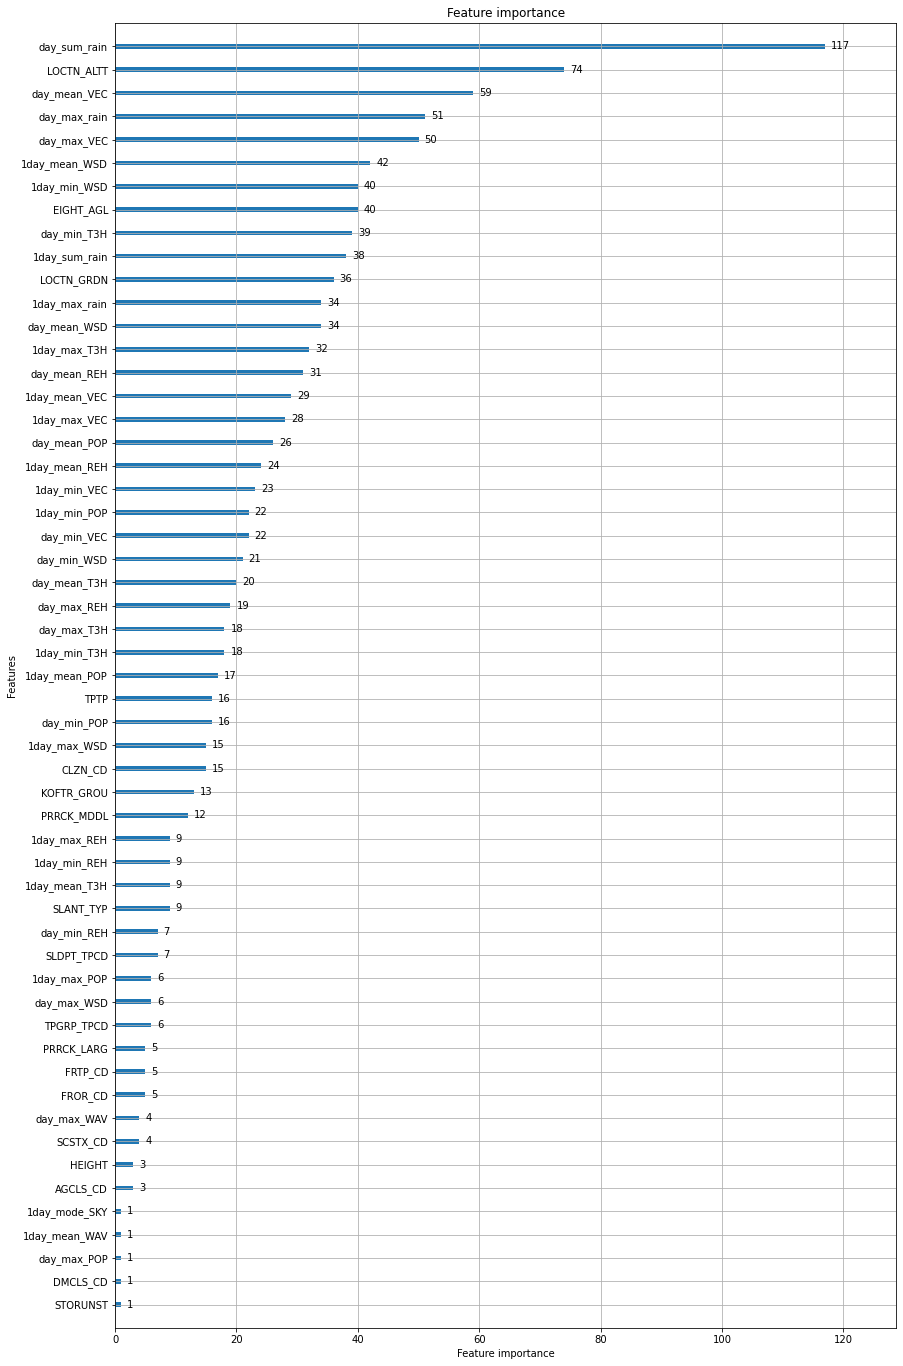

In [51]:
# LIGHTGBM  학습
                       
lgbm2 = LGBMClassifier(n_estimators=300, learning_rate=0.06745, num_leaves=31, sumbsample=0.9385, colsample_bytree=0.5702, max_depth=9,
                             min_child_weight=8.873)
evals = [(X_test2, y_test2)]
lgbm2.fit(X_train2, y_train2, early_stopping_rounds=100, eval_metric='binary_logloss', eval_set=evals, verbose=True)

from lightgbm import plot_importance #  변수 중요도
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(14, 24))
plot_importance(lgbm2, ax=ax)

In [52]:
# LIGHTGBM 베이지안 최적화
def modelFitter(colsampleByTree, subsample,maxDepth, num_leaves,learning_rate,min_child_weight):

    model = LGBMClassifier(learning_rate=learning_rate, n_estimators=1000, max_depth=maxDepth.astype("int32"), subsample=subsample, colsample_bytree=colsampleByTree,num_leaves=num_leaves.astype("int32"),min_child_weight=min_child_weight)

    evalSet  = [(X_test3, y_test3)]
    model.fit(X_resampled3, y_resampled3, eval_metric="", eval_set=evalSet, early_stopping_rounds=50, verbose=False)

    bestScore = model.best_score_[list(model.best_score_.keys())[0]]['binary_logloss']

    return -bestScore

# Bounded region of parameter space
pbounds = {'colsampleByTree': (0.5,1.0), 'subsample': (0.8,1.0), 'maxDepth': (3,10), 'num_leaves': (24, 45),'learning_rate':(0.01,0.3),'min_child_weight':(5,9)}

optimizer = BayesianOptimization(
    f=modelFitter,
    pbounds=pbounds,
    random_state=1)

optimizer.maximize(init_points=5,n_iter=5) 

|   iter    |  target   | colsam... | learni... | maxDepth  | min_ch... | num_le... | subsample |
-------------------------------------------------------------------------------------------------
|  1        | -0.09483  |  0.7085   |  0.2189   |  3.001    |  6.209    |  27.08    |  0.8185   |
|  2        | -0.0903   |  0.5931   |  0.1102   |  5.777    |  7.155    |  32.8     |  0.937    |
|  3        | -0.09563  |  0.6022   |  0.2647   |  3.192    |  7.682    |  32.76    |  0.9117   |
|  4        | -0.09253  |  0.5702   |  0.06745  |  8.605    |  8.873    |  30.58    |  0.9385   |
|  5        | -0.09729  |  0.9382   |  0.2694   |  3.595    |  5.156    |  27.57    |  0.9756   |
|  6        | -0.09087  |  0.5916   |  0.08524  |  6.561    |  7.371    |  32.47    |  0.941    |
|  7        | -0.0894   |  0.5891   |  0.1083   |  6.507    |  5.995    |  33.79    |  0.9642   |
|  8        | -0.09505  |  0.5      |  0.01     |  6.717    |  7.556    |  35.41    |  0.8      |
|  9        | -0.088

[1]	valid_0's binary_logloss: 0.173209
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.158196
[3]	valid_0's binary_logloss: 0.145165
[4]	valid_0's binary_logloss: 0.134564
[5]	valid_0's binary_logloss: 0.128334
[6]	valid_0's binary_logloss: 0.121005
[7]	valid_0's binary_logloss: 0.115418
[8]	valid_0's binary_logloss: 0.109993
[9]	valid_0's binary_logloss: 0.105508
[10]	valid_0's binary_logloss: 0.101884
[11]	valid_0's binary_logloss: 0.100205
[12]	valid_0's binary_logloss: 0.096956
[13]	valid_0's binary_logloss: 0.0944617
[14]	valid_0's binary_logloss: 0.0931846
[15]	valid_0's binary_logloss: 0.092458
[16]	valid_0's binary_logloss: 0.090351
[17]	valid_0's binary_logloss: 0.0883917
[18]	valid_0's binary_logloss: 0.0873221
[19]	valid_0's binary_logloss: 0.086288
[20]	valid_0's binary_logloss: 0.0852793
[21]	valid_0's binary_logloss: 0.0841446
[22]	valid_0's binary_logloss: 0.0833338
[23]	valid_0's binary_logloss: 0.0828409
[24]	valid_0's bina

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

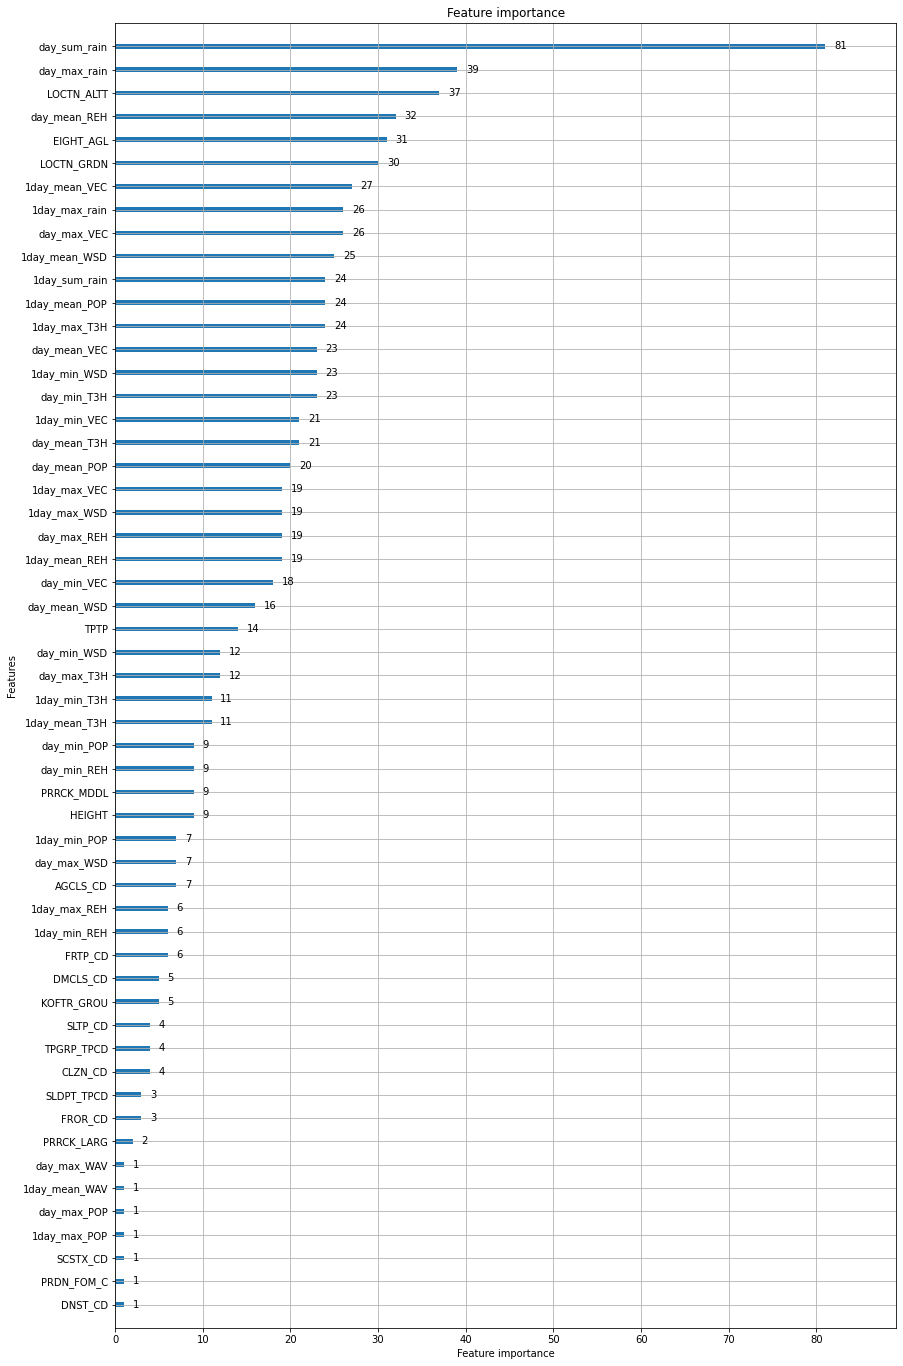

In [53]:
# LIGHTGBM  학습
                       
lgbm3 = LGBMClassifier(n_estimators=300, learning_rate=0.1102, num_leaves=33, sumbsample=0.937, colsample_bytree=0.5931, max_depth=6,
                             min_child_weight=7.155)
evals = [(X_test3, y_test3)]
lgbm3.fit(X_train3, y_train3, early_stopping_rounds=100, eval_metric='binary_logloss', eval_set=evals, verbose=True)

from lightgbm import plot_importance #  변수 중요도
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(14, 24))
plot_importance(lgbm3, ax=ax)

In [54]:
# LIGHTGBM 베이지안 최적화
def modelFitter(colsampleByTree, subsample,maxDepth, num_leaves,learning_rate,min_child_weight):

    model = LGBMClassifier(learning_rate=learning_rate, n_estimators=1000, max_depth=maxDepth.astype("int32"), subsample=subsample, colsample_bytree=colsampleByTree,num_leaves=num_leaves.astype("int32"),min_child_weight=min_child_weight)

    evalSet  = [(X_test4, y_test4)]
    model.fit(X_resampled4, y_resampled4, eval_metric="binary_logloss", eval_set=evalSet, early_stopping_rounds=50, verbose=False)

    bestScore = model.best_score_[list(model.best_score_.keys())[0]]['binary_logloss']

    return -bestScore

# Bounded region of parameter space
pbounds = {'colsampleByTree': (0.5,1.0), 'subsample': (0.8,1.0), 'maxDepth': (3,10), 'num_leaves': (24, 45),'learning_rate':(0.01,0.3),'min_child_weight':(5,9)}

optimizer = BayesianOptimization(
    f=modelFitter,
    pbounds=pbounds,
    random_state=1)

optimizer.maximize(init_points=5,n_iter=5) 

|   iter    |  target   | colsam... | learni... | maxDepth  | min_ch... | num_le... | subsample |
-------------------------------------------------------------------------------------------------
|  1        | -0.07342  |  0.7085   |  0.2189   |  3.001    |  6.209    |  27.08    |  0.8185   |
|  2        | -0.07537  |  0.5931   |  0.1102   |  5.777    |  7.155    |  32.8     |  0.937    |
|  3        | -0.07483  |  0.6022   |  0.2647   |  3.192    |  7.682    |  32.76    |  0.9117   |
|  4        | -0.07329  |  0.5702   |  0.06745  |  8.605    |  8.873    |  30.58    |  0.9385   |
|  5        | -0.07429  |  0.9382   |  0.2694   |  3.595    |  5.156    |  27.57    |  0.9756   |
|  6        | -0.07635  |  0.706    |  0.1596   |  9.212    |  8.82     |  29.37    |  0.8467   |
|  7        | -0.0753   |  0.7989   |  0.1023   |  7.641    |  6.794    |  27.62    |  0.8606   |
|  8        | -0.07685  |  0.5725   |  0.2854   |  3.032    |  6.327    |  27.18    |  0.9822   |
|  9        | -0.073

[1]	valid_0's binary_logloss: 0.155581
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.144018
[3]	valid_0's binary_logloss: 0.132464
[4]	valid_0's binary_logloss: 0.122787
[5]	valid_0's binary_logloss: 0.116531
[6]	valid_0's binary_logloss: 0.111226
[7]	valid_0's binary_logloss: 0.106894
[8]	valid_0's binary_logloss: 0.102502
[9]	valid_0's binary_logloss: 0.0989867
[10]	valid_0's binary_logloss: 0.0954032
[11]	valid_0's binary_logloss: 0.0936226
[12]	valid_0's binary_logloss: 0.0906289
[13]	valid_0's binary_logloss: 0.0885433
[14]	valid_0's binary_logloss: 0.0865951
[15]	valid_0's binary_logloss: 0.0850846
[16]	valid_0's binary_logloss: 0.0833071
[17]	valid_0's binary_logloss: 0.0819891
[18]	valid_0's binary_logloss: 0.0808582
[19]	valid_0's binary_logloss: 0.0791637
[20]	valid_0's binary_logloss: 0.0780201
[21]	valid_0's binary_logloss: 0.07711
[22]	valid_0's binary_logloss: 0.0761021
[23]	valid_0's binary_logloss: 0.0750433
[24]	valid_0's

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

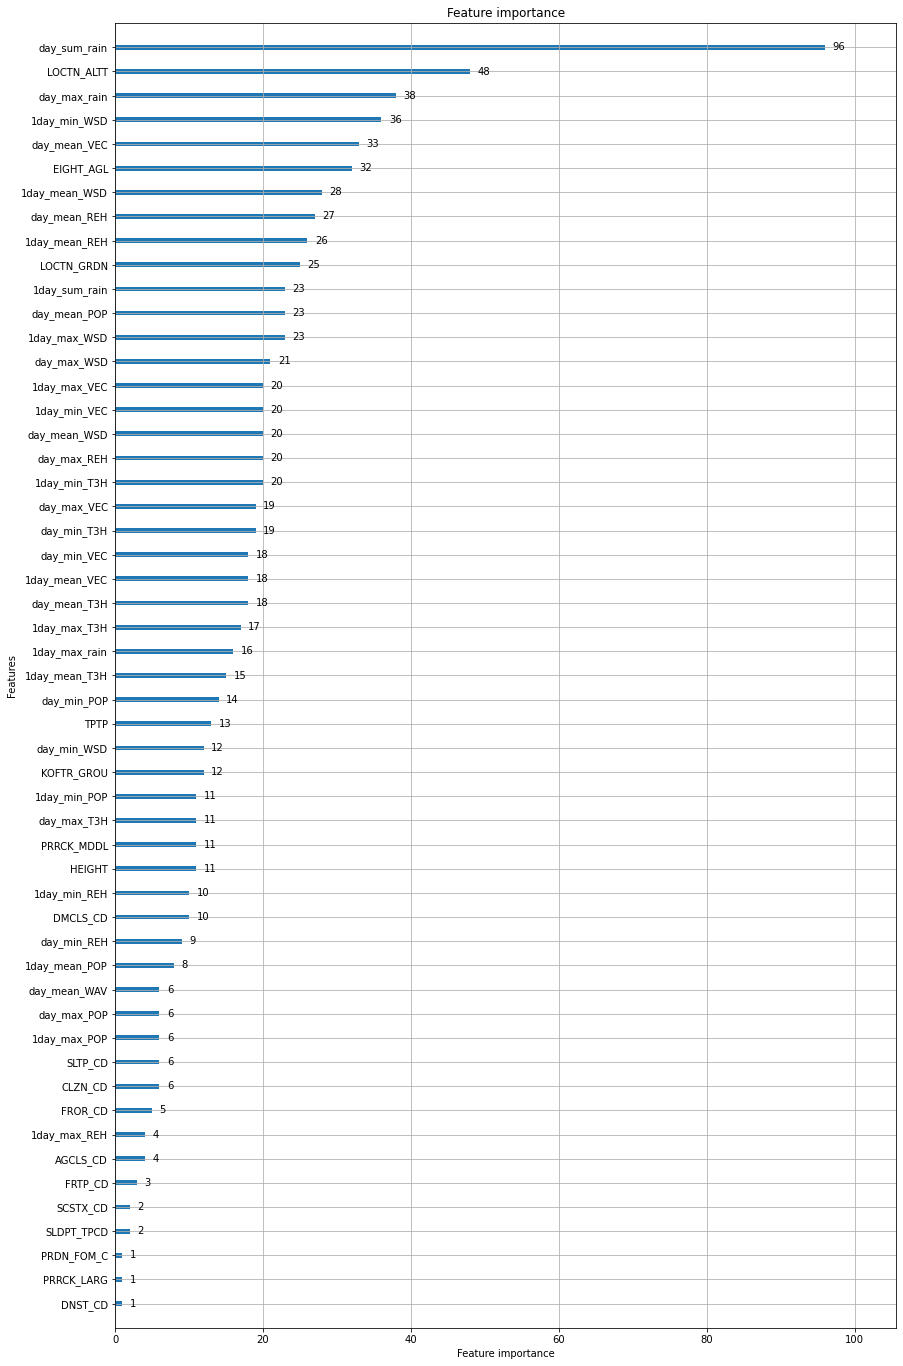

In [55]:
# LIGHTGBM  학습
                       
lgbm4 = LGBMClassifier(n_estimators=300, learning_rate=0.1023, num_leaves=28, sumbsample=0.8606, colsample_bytree=0.7989, max_depth=8,
                             min_child_weight=6.794)
evals = [(X_test4, y_test4)]
lgbm4.fit(X_train4, y_train4, early_stopping_rounds=100, eval_metric='binary_logloss', eval_set=evals, verbose=True)

from lightgbm import plot_importance #  변수 중요도
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(14, 24))
plot_importance(lgbm4, ax=ax)

In [56]:
# LIGHTGBM 베이지안 최적화
def modelFitter(colsampleByTree, subsample,maxDepth, num_leaves,learning_rate,min_child_weight):

    model = LGBMClassifier(learning_rate=learning_rate, n_estimators=1000, max_depth=maxDepth.astype("int32"), subsample=subsample, colsample_bytree=colsampleByTree,num_leaves=num_leaves.astype("int32"),min_child_weight=min_child_weight)

    evalSet  = [(X_test5, y_test5)]
    model.fit(X_resampled5, y_resampled5, eval_metric="binary_logloss", eval_set=evalSet, early_stopping_rounds=50, verbose=False)

    bestScore = model.best_score_[list(model.best_score_.keys())[0]]['binary_logloss']

    return -bestScore

# Bounded region of parameter space
pbounds = {'colsampleByTree': (0.5,1.0), 'subsample': (0.8,1.0), 'maxDepth': (3,10), 'num_leaves': (24, 45),'learning_rate':(0.01,0.3),'min_child_weight':(5,9)}

optimizer = BayesianOptimization(
    f=modelFitter,
    pbounds=pbounds,
    random_state=1)

optimizer.maximize(init_points=5,n_iter=5) 

|   iter    |  target   | colsam... | learni... | maxDepth  | min_ch... | num_le... | subsample |
-------------------------------------------------------------------------------------------------
|  1        | -0.07188  |  0.7085   |  0.2189   |  3.001    |  6.209    |  27.08    |  0.8185   |
|  2        | -0.07086  |  0.5931   |  0.1102   |  5.777    |  7.155    |  32.8     |  0.937    |
|  3        | -0.07167  |  0.6022   |  0.2647   |  3.192    |  7.682    |  32.76    |  0.9117   |
|  4        | -0.06736  |  0.5702   |  0.06745  |  8.605    |  8.873    |  30.58    |  0.9385   |
|  5        | -0.07534  |  0.9382   |  0.2694   |  3.595    |  5.156    |  27.57    |  0.9756   |
|  6        | -0.06739  |  0.5735   |  0.02164  |  8.342    |  8.207    |  30.34    |  0.8306   |
|  7        | -0.06874  |  0.5615   |  0.07446  |  9.803    |  8.669    |  28.84    |  0.8      |
|  8        | -0.07285  |  1.0      |  0.01     |  10.0     |  7.477    |  31.73    |  0.9588   |
|  9        | -0.071

[1]	valid_0's binary_logloss: 0.15471
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.14255
[3]	valid_0's binary_logloss: 0.1303
[4]	valid_0's binary_logloss: 0.121239
[5]	valid_0's binary_logloss: 0.116251
[6]	valid_0's binary_logloss: 0.109709
[7]	valid_0's binary_logloss: 0.104957
[8]	valid_0's binary_logloss: 0.100109
[9]	valid_0's binary_logloss: 0.0963356
[10]	valid_0's binary_logloss: 0.0929578
[11]	valid_0's binary_logloss: 0.0910695
[12]	valid_0's binary_logloss: 0.0886901
[13]	valid_0's binary_logloss: 0.08628
[14]	valid_0's binary_logloss: 0.0847048
[15]	valid_0's binary_logloss: 0.0826797
[16]	valid_0's binary_logloss: 0.0808519
[17]	valid_0's binary_logloss: 0.0791751
[18]	valid_0's binary_logloss: 0.078145
[19]	valid_0's binary_logloss: 0.0768657
[20]	valid_0's binary_logloss: 0.0759039
[21]	valid_0's binary_logloss: 0.0752865
[22]	valid_0's binary_logloss: 0.0742778
[23]	valid_0's binary_logloss: 0.0734571
[24]	valid_0's bina

[218]	valid_0's binary_logloss: 0.0570166
[219]	valid_0's binary_logloss: 0.0569442
[220]	valid_0's binary_logloss: 0.0569706
[221]	valid_0's binary_logloss: 0.0570141
[222]	valid_0's binary_logloss: 0.0569106
[223]	valid_0's binary_logloss: 0.0568827
[224]	valid_0's binary_logloss: 0.0567976
[225]	valid_0's binary_logloss: 0.0567493
[226]	valid_0's binary_logloss: 0.0567934
[227]	valid_0's binary_logloss: 0.0568514
[228]	valid_0's binary_logloss: 0.0568409
[229]	valid_0's binary_logloss: 0.0569211
[230]	valid_0's binary_logloss: 0.0569361
[231]	valid_0's binary_logloss: 0.0568992
[232]	valid_0's binary_logloss: 0.0568442
[233]	valid_0's binary_logloss: 0.05693
[234]	valid_0's binary_logloss: 0.0569456
[235]	valid_0's binary_logloss: 0.0569845
[236]	valid_0's binary_logloss: 0.0570268
[237]	valid_0's binary_logloss: 0.0570794
[238]	valid_0's binary_logloss: 0.05704
[239]	valid_0's binary_logloss: 0.0571123
[240]	valid_0's binary_logloss: 0.057042
[241]	valid_0's binary_logloss: 0.05695

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

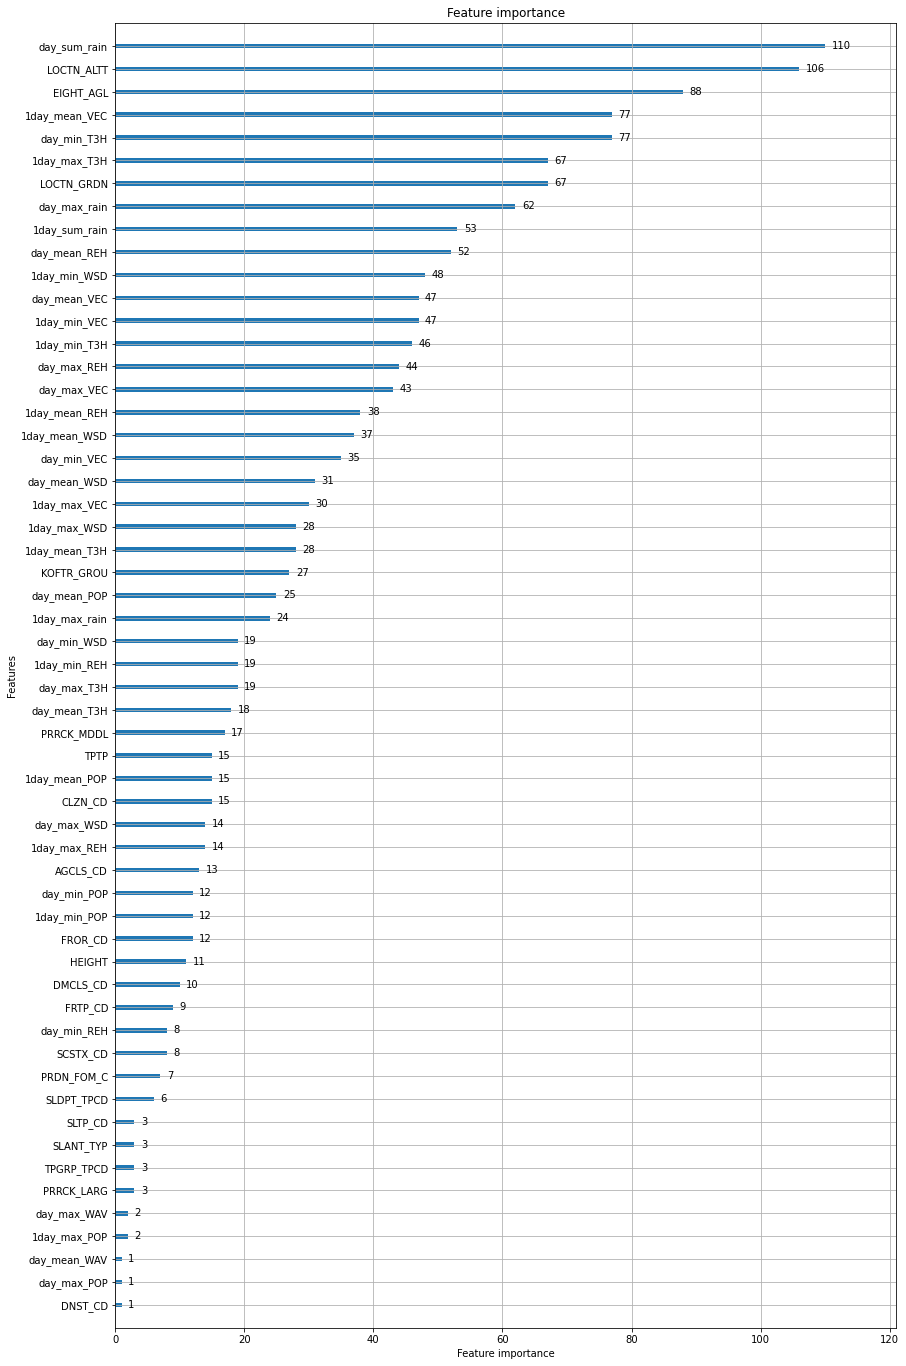

In [57]:
# LIGHTGBM  학습
                       
lgbm5 = LGBMClassifier(n_estimators=300, learning_rate=0.1066, num_leaves=30, sumbsample=0.9228, colsample_bytree=0.6408, max_depth=9,
                             min_child_weight=8.879)
evals = [(X_test5, y_test5)]
lgbm5.fit(X_train5, y_train5, early_stopping_rounds=100, eval_metric='binary_logloss', eval_set=evals, verbose=True)

from lightgbm import plot_importance #  변수 중요도
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(14, 24))
plot_importance(lgbm5, ax=ax)

In [58]:
# LIGHTGBM 베이지안 최적화
def modelFitter(colsampleByTree, subsample,maxDepth, num_leaves,learning_rate,min_child_weight):

    model = LGBMClassifier(learning_rate=learning_rate, n_estimators=1000, max_depth=maxDepth.astype("int32"), subsample=subsample, colsample_bytree=colsampleByTree,num_leaves=num_leaves.astype("int32"),min_child_weight=min_child_weight)

    evalSet  = [(X_test6, y_test6)]
    model.fit(X_resampled6, y_resampled6, eval_metric="binary_logloss", eval_set=evalSet, early_stopping_rounds=50, verbose=False)

    bestScore = model.best_score_[list(model.best_score_.keys())[0]]['binary_logloss']

    return -bestScore

# Bounded region of parameter space
pbounds = {'colsampleByTree': (0.5,1.0), 'subsample': (0.8,1.0), 'maxDepth': (3,10), 'num_leaves': (24, 45),'learning_rate':(0.01,0.3),'min_child_weight':(5,9)}

optimizer = BayesianOptimization(
    f=modelFitter,
    pbounds=pbounds,
    random_state=1)

optimizer.maximize(init_points=5,n_iter=5) 

|   iter    |  target   | colsam... | learni... | maxDepth  | min_ch... | num_le... | subsample |
-------------------------------------------------------------------------------------------------
|  1        | -0.08085  |  0.7085   |  0.2189   |  3.001    |  6.209    |  27.08    |  0.8185   |
|  2        | -0.07485  |  0.5931   |  0.1102   |  5.777    |  7.155    |  32.8     |  0.937    |
|  3        | -0.07605  |  0.6022   |  0.2647   |  3.192    |  7.682    |  32.76    |  0.9117   |
|  4        | -0.07525  |  0.5702   |  0.06745  |  8.605    |  8.873    |  30.58    |  0.9385   |
|  5        | -0.07909  |  0.9382   |  0.2694   |  3.595    |  5.156    |  27.57    |  0.9756   |
|  6        | -0.0799   |  1.0      |  0.2796   |  8.397    |  9.0      |  34.66    |  1.0      |
|  7        | -0.07748  |  0.5      |  0.01     |  6.238    |  8.021    |  30.83    |  0.9489   |
|  8        | -0.07328  |  0.5      |  0.03242  |  4.685    |  6.138    |  33.43    |  0.8721   |
|  9        | -0.072

[1]	valid_0's binary_logloss: 0.180329
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.163993
[3]	valid_0's binary_logloss: 0.148874
[4]	valid_0's binary_logloss: 0.136829
[5]	valid_0's binary_logloss: 0.13074
[6]	valid_0's binary_logloss: 0.122305
[7]	valid_0's binary_logloss: 0.11676
[8]	valid_0's binary_logloss: 0.110999
[9]	valid_0's binary_logloss: 0.106639
[10]	valid_0's binary_logloss: 0.102969
[11]	valid_0's binary_logloss: 0.101158
[12]	valid_0's binary_logloss: 0.0983517
[13]	valid_0's binary_logloss: 0.095397
[14]	valid_0's binary_logloss: 0.0935356
[15]	valid_0's binary_logloss: 0.0916168
[16]	valid_0's binary_logloss: 0.0898137
[17]	valid_0's binary_logloss: 0.0883982
[18]	valid_0's binary_logloss: 0.0870186
[19]	valid_0's binary_logloss: 0.0858844
[20]	valid_0's binary_logloss: 0.0850441
[21]	valid_0's binary_logloss: 0.0843631
[22]	valid_0's binary_logloss: 0.0839825
[23]	valid_0's binary_logloss: 0.0826595
[24]	valid_0's bin

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

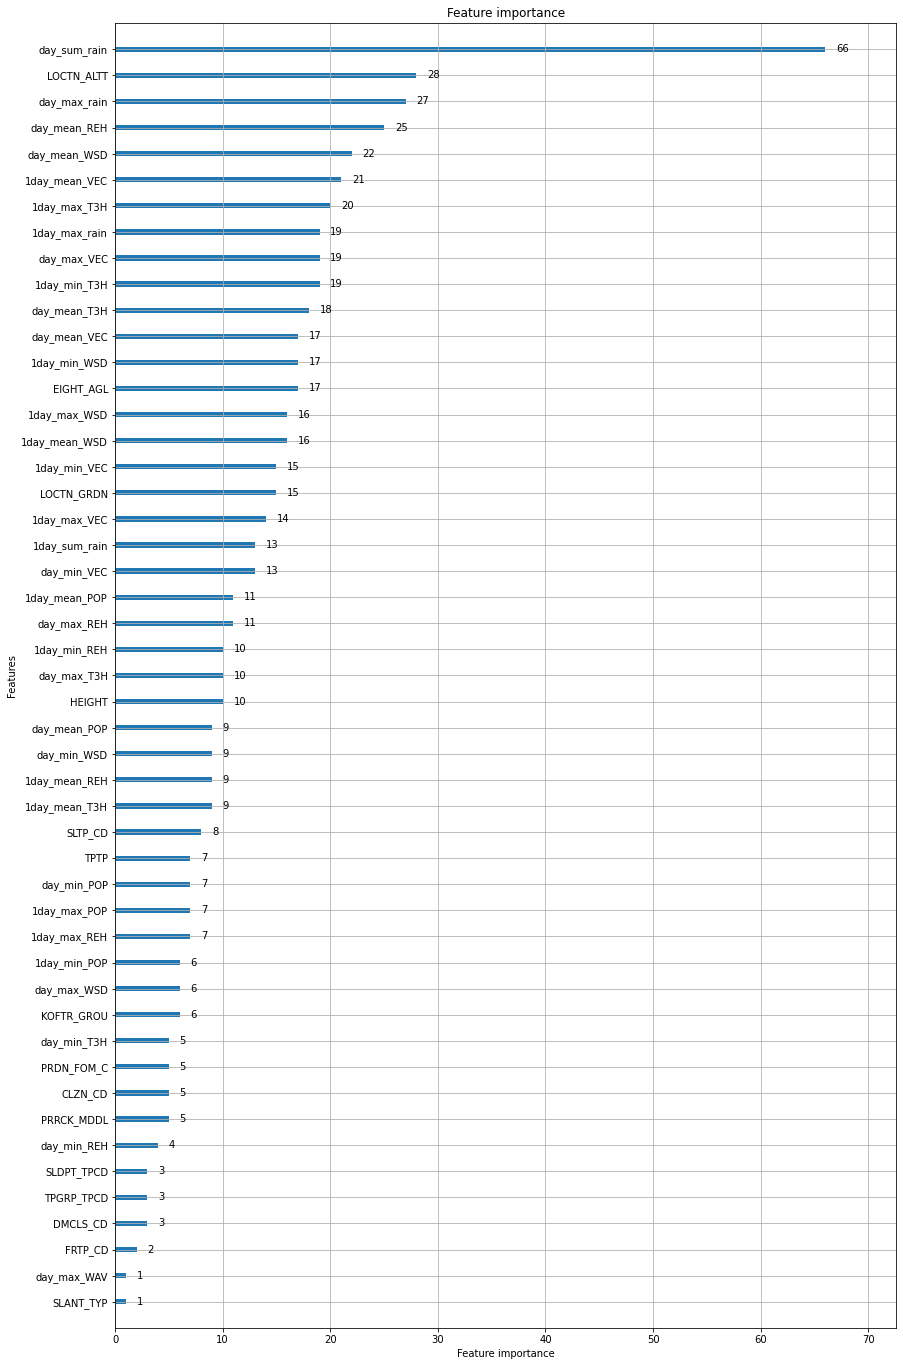

In [59]:
# LIGHTGBM  학습
                       
lgbm6 = LGBMClassifier(n_estimators=300, learning_rate=0.1102, num_leaves=33, sumbsample=0.937, colsample_bytree=0.5931, max_depth=6,
                             min_child_weight=7.155)
evals = [(X_test6, y_test6)]
lgbm6.fit(X_train6, y_train6, early_stopping_rounds=100, eval_metric='binary_logloss', eval_set=evals, verbose=True)

from lightgbm import plot_importance #  변수 중요도
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(14, 24))
plot_importance(lgbm6, ax=ax)

In [60]:
# LIGHTGBM 베이지안 최적화
def modelFitter(colsampleByTree, subsample,maxDepth, num_leaves,learning_rate,min_child_weight):

    model = LGBMClassifier(learning_rate=learning_rate, n_estimators=1000, max_depth=maxDepth.astype("int32"), subsample=subsample, colsample_bytree=colsampleByTree,num_leaves=num_leaves.astype("int32"),min_child_weight=min_child_weight)

    evalSet  = [(X_test7, y_test7)]
    model.fit(X_resampled7, y_resampled7, eval_metric="binary_logloss", eval_set=evalSet, early_stopping_rounds=50, verbose=False)

    bestScore = model.best_score_[list(model.best_score_.keys())[0]]['binary_logloss']

    return -bestScore

# Bounded region of parameter space
pbounds = {'colsampleByTree': (0.5,1.0), 'subsample': (0.8,1.0), 'maxDepth': (3,10), 'num_leaves': (24, 45),'learning_rate':(0.01,0.3),'min_child_weight':(5,9)}

optimizer = BayesianOptimization(
    f=modelFitter,
    pbounds=pbounds,
    random_state=1)

optimizer.maximize(init_points=5,n_iter=5) 

|   iter    |  target   | colsam... | learni... | maxDepth  | min_ch... | num_le... | subsample |
-------------------------------------------------------------------------------------------------
|  1        | -0.1036   |  0.7085   |  0.2189   |  3.001    |  6.209    |  27.08    |  0.8185   |
|  2        | -0.1      |  0.5931   |  0.1102   |  5.777    |  7.155    |  32.8     |  0.937    |
|  3        | -0.1015   |  0.6022   |  0.2647   |  3.192    |  7.682    |  32.76    |  0.9117   |
|  4        | -0.09857  |  0.5702   |  0.06745  |  8.605    |  8.873    |  30.58    |  0.9385   |
|  5        | -0.1091   |  0.9382   |  0.2694   |  3.595    |  5.156    |  27.57    |  0.9756   |
|  6        | -0.09967  |  0.5869   |  0.05276  |  7.868    |  8.421    |  31.18    |  0.943    |
|  7        | -0.1011   |  0.5027   |  0.1493   |  9.66     |  8.93     |  31.84    |  0.8359   |
|  8        | -0.09589  |  0.705    |  0.01     |  8.827    |  7.612    |  29.52    |  0.8157   |
|  9        | -0.097

[1]	valid_0's binary_logloss: 0.176802
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.164862
[3]	valid_0's binary_logloss: 0.151442
[4]	valid_0's binary_logloss: 0.140297
[5]	valid_0's binary_logloss: 0.131917
[6]	valid_0's binary_logloss: 0.125008
[7]	valid_0's binary_logloss: 0.119276
[8]	valid_0's binary_logloss: 0.114423
[9]	valid_0's binary_logloss: 0.110511
[10]	valid_0's binary_logloss: 0.107391
[11]	valid_0's binary_logloss: 0.106117
[12]	valid_0's binary_logloss: 0.103824
[13]	valid_0's binary_logloss: 0.101834
[14]	valid_0's binary_logloss: 0.09975
[15]	valid_0's binary_logloss: 0.0979898
[16]	valid_0's binary_logloss: 0.0964293
[17]	valid_0's binary_logloss: 0.0957414
[18]	valid_0's binary_logloss: 0.0943244
[19]	valid_0's binary_logloss: 0.0931852
[20]	valid_0's binary_logloss: 0.0924211
[21]	valid_0's binary_logloss: 0.0914441
[22]	valid_0's binary_logloss: 0.0905509
[23]	valid_0's binary_logloss: 0.0901231
[24]	valid_0's bina

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

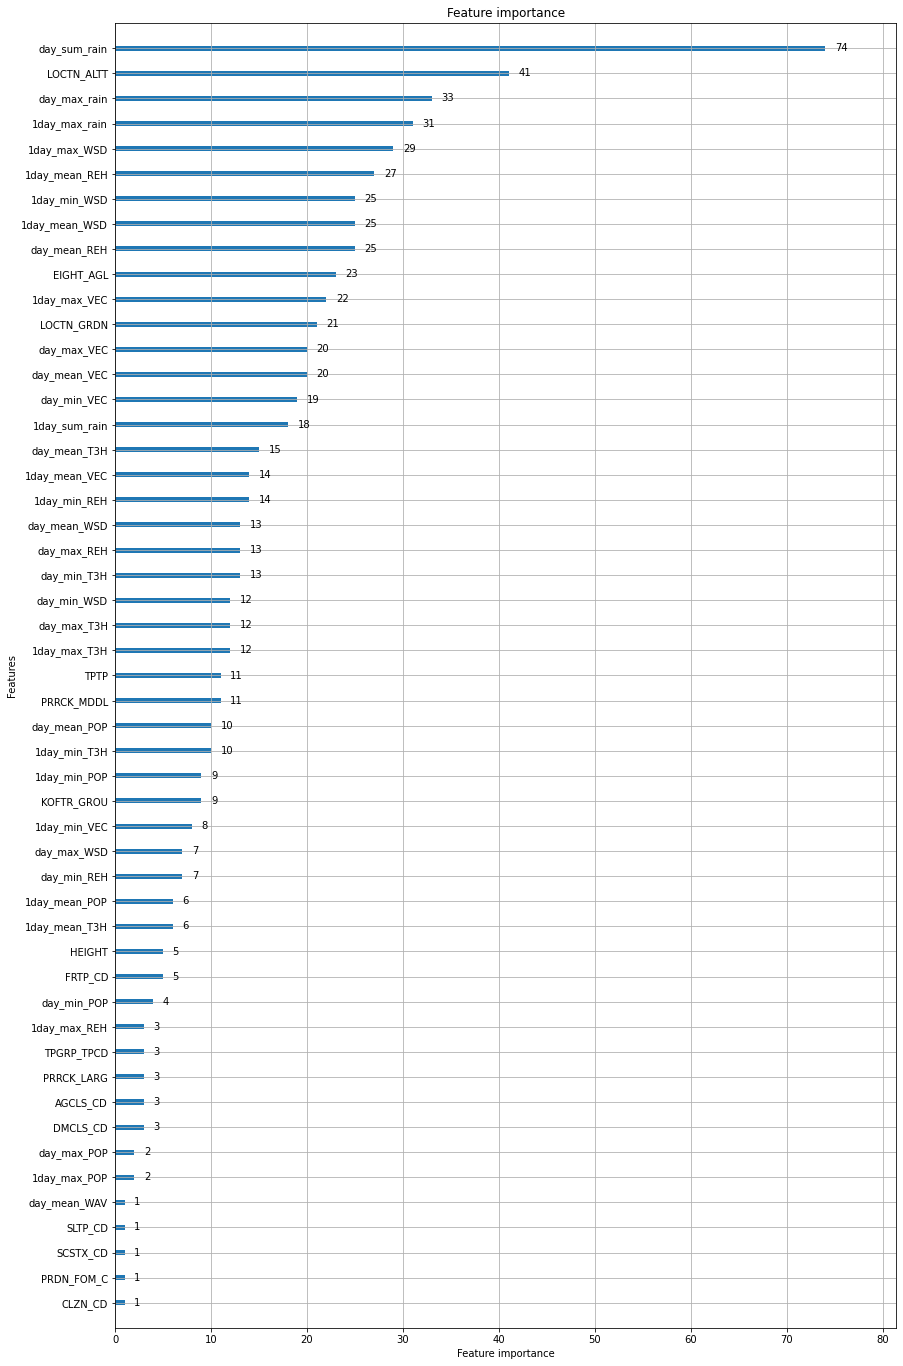

In [61]:
# LIGHTGBM  학습
                       
lgbm7 = LGBMClassifier(n_estimators=300, learning_rate=0.1023, num_leaves=28, sumbsample=0.8606, colsample_bytree=0.7989, max_depth=8,
                             min_child_weight=6.794)
evals = [(X_test7, y_test7)]
lgbm7.fit(X_train7, y_train7, early_stopping_rounds=100, eval_metric='binary_logloss', eval_set=evals, verbose=True)

from lightgbm import plot_importance #  변수 중요도
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(14, 24))
plot_importance(lgbm7, ax=ax)

In [62]:
# LIGHTGBM 베이지안 최적화
def modelFitter(colsampleByTree, subsample,maxDepth, num_leaves,learning_rate,min_child_weight):

    model = LGBMClassifier(learning_rate=learning_rate, n_estimators=1000, max_depth=maxDepth.astype("int32"), subsample=subsample, colsample_bytree=colsampleByTree,num_leaves=num_leaves.astype("int32"),min_child_weight=min_child_weight)

    evalSet  = [(X_test8, y_test8)]
    model.fit(X_resampled8, y_resampled8, eval_metric="binary_logloss", eval_set=evalSet, early_stopping_rounds=50, verbose=False)

    bestScore = model.best_score_[list(model.best_score_.keys())[0]]['binary_logloss']

    return -bestScore

# Bounded region of parameter space
pbounds = {'colsampleByTree': (0.5,1.0), 'subsample': (0.8,1.0), 'maxDepth': (3,10), 'num_leaves': (24, 45),'learning_rate':(0.01,0.3),'min_child_weight':(5,9)}

optimizer = BayesianOptimization(
    f=modelFitter,
    pbounds=pbounds,
    random_state=1)

optimizer.maximize(init_points=5,n_iter=5) 

|   iter    |  target   | colsam... | learni... | maxDepth  | min_ch... | num_le... | subsample |
-------------------------------------------------------------------------------------------------
|  1        | -0.08583  |  0.7085   |  0.2189   |  3.001    |  6.209    |  27.08    |  0.8185   |
|  2        | -0.08655  |  0.5931   |  0.1102   |  5.777    |  7.155    |  32.8     |  0.937    |
|  3        | -0.08627  |  0.6022   |  0.2647   |  3.192    |  7.682    |  32.76    |  0.9117   |
|  4        | -0.08595  |  0.5702   |  0.06745  |  8.605    |  8.873    |  30.58    |  0.9385   |
|  5        | -0.0838   |  0.9382   |  0.2694   |  3.595    |  5.156    |  27.57    |  0.9756   |
|  6        | -0.08901  |  0.7807   |  0.1189   |  6.352    |  7.245    |  26.89    |  0.9289   |
|  7        | -0.08556  |  0.8253   |  0.02038  |  4.045    |  5.091    |  28.25    |  0.9247   |
|  8        | -0.09261  |  0.6342   |  0.2933   |  3.976    |  5.149    |  27.01    |  0.8729   |
|  9        | -0.085

[1]	valid_0's binary_logloss: 0.197673
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.189624
[3]	valid_0's binary_logloss: 0.18165
[4]	valid_0's binary_logloss: 0.174193
[5]	valid_0's binary_logloss: 0.169249
[6]	valid_0's binary_logloss: 0.16315
[7]	valid_0's binary_logloss: 0.158502
[8]	valid_0's binary_logloss: 0.153147
[9]	valid_0's binary_logloss: 0.148052
[10]	valid_0's binary_logloss: 0.143175
[11]	valid_0's binary_logloss: 0.140048
[12]	valid_0's binary_logloss: 0.136311
[13]	valid_0's binary_logloss: 0.132996
[14]	valid_0's binary_logloss: 0.129733
[15]	valid_0's binary_logloss: 0.127193
[16]	valid_0's binary_logloss: 0.123678
[17]	valid_0's binary_logloss: 0.120559
[18]	valid_0's binary_logloss: 0.117809
[19]	valid_0's binary_logloss: 0.11509
[20]	valid_0's binary_logloss: 0.112863
[21]	valid_0's binary_logloss: 0.11073
[22]	valid_0's binary_logloss: 0.108649
[23]	valid_0's binary_logloss: 0.106901
[24]	valid_0's binary_logloss: 

[202]	valid_0's binary_logloss: 0.0764413
[203]	valid_0's binary_logloss: 0.0764604
[204]	valid_0's binary_logloss: 0.0762476
[205]	valid_0's binary_logloss: 0.0763138
[206]	valid_0's binary_logloss: 0.0762999
[207]	valid_0's binary_logloss: 0.0762956
[208]	valid_0's binary_logloss: 0.0763135
[209]	valid_0's binary_logloss: 0.0763737
[210]	valid_0's binary_logloss: 0.0762383
[211]	valid_0's binary_logloss: 0.0761135
[212]	valid_0's binary_logloss: 0.0760135
[213]	valid_0's binary_logloss: 0.0759718
[214]	valid_0's binary_logloss: 0.0760078
[215]	valid_0's binary_logloss: 0.0759967
[216]	valid_0's binary_logloss: 0.0760763
[217]	valid_0's binary_logloss: 0.0759834
[218]	valid_0's binary_logloss: 0.0759454
[219]	valid_0's binary_logloss: 0.0758574
[220]	valid_0's binary_logloss: 0.0759033
[221]	valid_0's binary_logloss: 0.0758626
[222]	valid_0's binary_logloss: 0.0758045
[223]	valid_0's binary_logloss: 0.0758568
[224]	valid_0's binary_logloss: 0.0757711
[225]	valid_0's binary_logloss: 0.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

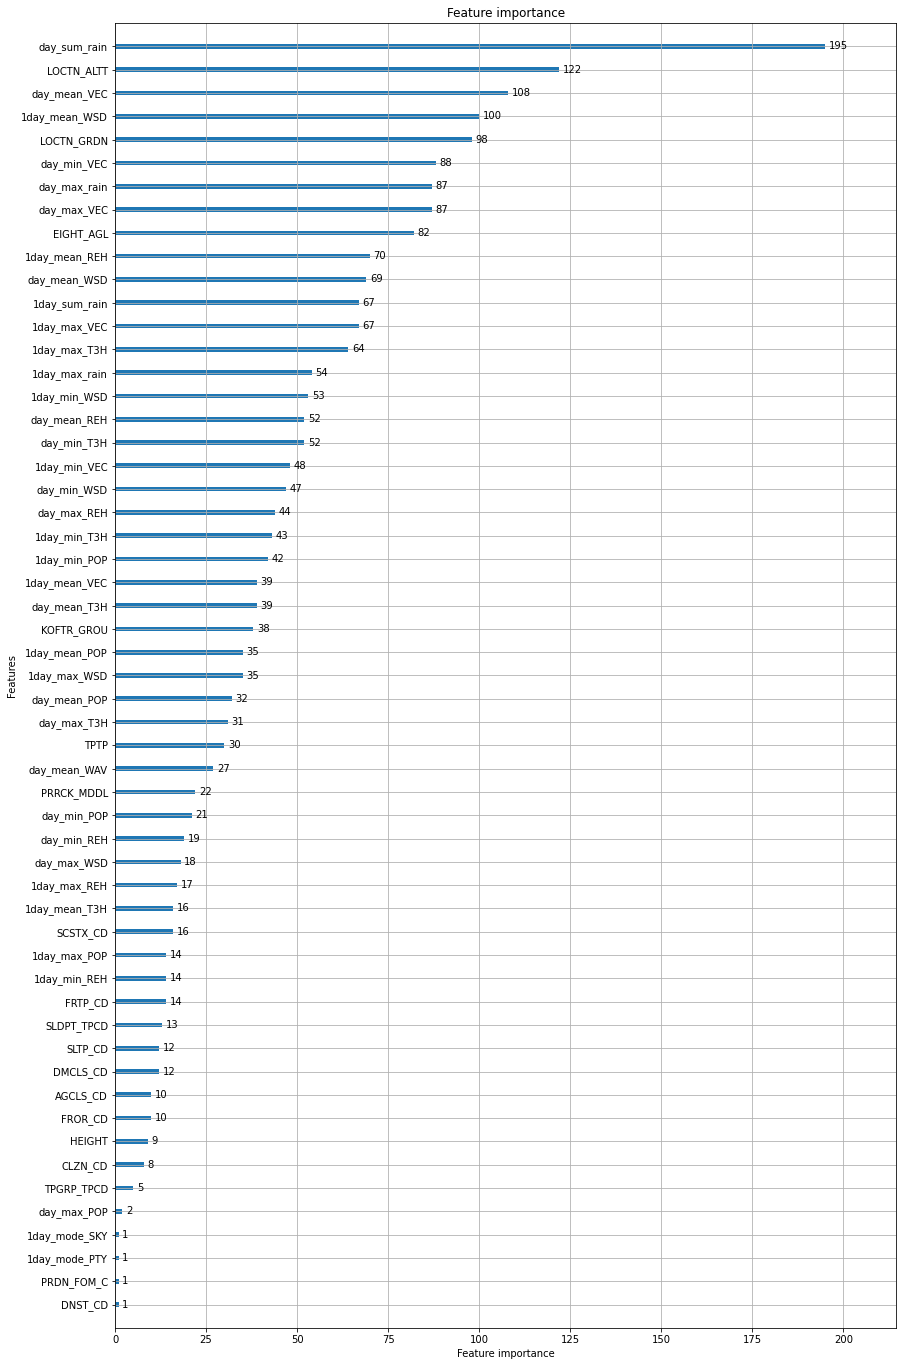

In [63]:
# LIGHTGBM  학습
                       
lgbm8 = LGBMClassifier(n_estimators=300, learning_rate=0.04547, num_leaves=38, sumbsample=0.879, colsample_bytree= 0.7048, max_depth=8,
                             min_child_weight=8.472)
evals = [(X_test8, y_test8)]
lgbm8.fit(X_train8, y_train8, early_stopping_rounds=100, eval_metric='binary_logloss', eval_set=evals, verbose=True)

from lightgbm import plot_importance #  변수 중요도
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(14, 24))
plot_importance(lgbm8, ax=ax)

In [64]:
# LIGHTGBM 베이지안 최적화
def modelFitter(colsampleByTree, subsample,maxDepth, num_leaves,learning_rate,min_child_weight):

    model = LGBMClassifier(learning_rate=learning_rate, n_estimators=1000, max_depth=maxDepth.astype("int32"), subsample=subsample, colsample_bytree=colsampleByTree,num_leaves=num_leaves.astype("int32"),min_child_weight=min_child_weight)

    evalSet  = [(X_test9, y_test9)]
    model.fit(X_resampled9, y_resampled9, eval_metric="binary_logloss", eval_set=evalSet, early_stopping_rounds=50, verbose=False)

    bestScore = model.best_score_[list(model.best_score_.keys())[0]]['binary_logloss']

    return bestScore

# Bounded region of parameter space
pbounds = {'colsampleByTree': (0.5,1.0), 'subsample': (0.8,1.0), 'maxDepth': (3,10), 'num_leaves': (24, 45),'learning_rate':(0.01,0.3),'min_child_weight':(5,9)}

optimizer = BayesianOptimization(
    f=modelFitter,
    pbounds=pbounds,
    random_state=1)

optimizer.maximize(init_points=5,n_iter=5) 

|   iter    |  target   | colsam... | learni... | maxDepth  | min_ch... | num_le... | subsample |
-------------------------------------------------------------------------------------------------
|  1        |  0.1065   |  0.7085   |  0.2189   |  3.001    |  6.209    |  27.08    |  0.8185   |
|  2        |  0.1053   |  0.5931   |  0.1102   |  5.777    |  7.155    |  32.8     |  0.937    |
|  3        |  0.1083   |  0.6022   |  0.2647   |  3.192    |  7.682    |  32.76    |  0.9117   |
|  4        |  0.1007   |  0.5702   |  0.06745  |  8.605    |  8.873    |  30.58    |  0.9385   |
|  5        |  0.1073   |  0.9382   |  0.2694   |  3.595    |  5.156    |  27.57    |  0.9756   |
|  6        |  0.1075   |  1.0      |  0.3      |  3.0      |  5.0      |  35.74    |  0.8008   |
|  7        |  0.1102   |  0.5      |  0.3      |  3.0      |  9.0      |  37.8     |  1.0      |
|  8        |  0.1102   |  0.5      |  0.3      |  3.0      |  9.0      |  42.42    |  1.0      |
|  9        |  0.099

[1]	valid_0's binary_logloss: 0.157001
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.140802
[3]	valid_0's binary_logloss: 0.129598
[4]	valid_0's binary_logloss: 0.11735
[5]	valid_0's binary_logloss: 0.114715
[6]	valid_0's binary_logloss: 0.108704
[7]	valid_0's binary_logloss: 0.104455
[8]	valid_0's binary_logloss: 0.102644
[9]	valid_0's binary_logloss: 0.0997468
[10]	valid_0's binary_logloss: 0.0992669
[11]	valid_0's binary_logloss: 0.0975452
[12]	valid_0's binary_logloss: 0.0955221
[13]	valid_0's binary_logloss: 0.0950504
[14]	valid_0's binary_logloss: 0.0948216
[15]	valid_0's binary_logloss: 0.0948404
[16]	valid_0's binary_logloss: 0.0945676
[17]	valid_0's binary_logloss: 0.0940574
[18]	valid_0's binary_logloss: 0.0944267
[19]	valid_0's binary_logloss: 0.0944441
[20]	valid_0's binary_logloss: 0.0940261
[21]	valid_0's binary_logloss: 0.0936486
[22]	valid_0's binary_logloss: 0.0928808
[23]	valid_0's binary_logloss: 0.0930436
[24]	valid_0'

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

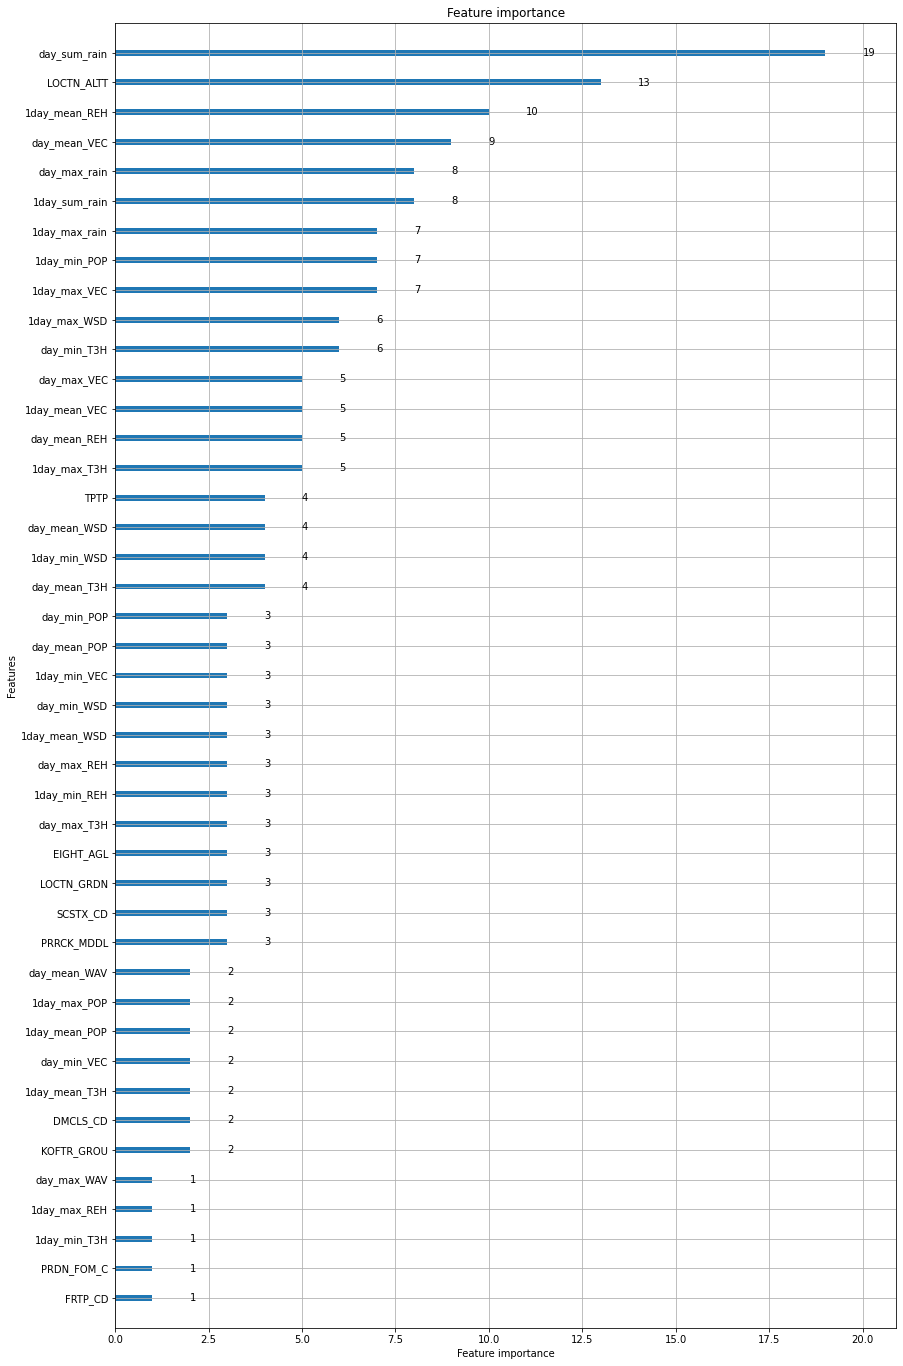

In [65]:
# LIGHTGBM  학습
                       
lgbm9 = LGBMClassifier(n_estimators=300, learning_rate=0.2647, num_leaves=33, sumbsample=0.9117, colsample_bytree=0.6022, max_depth=3,
                             min_child_weight=7.682)
evals = [(X_test9, y_test9)]
lgbm9.fit(X_train9, y_train9, early_stopping_rounds=100, eval_metric='binary_logloss', eval_set=evals, verbose=True)

from lightgbm import plot_importance #  변수 중요도
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(14, 24))
plot_importance(lgbm9, ax=ax)

In [66]:
# LIGHTGBM 베이지안 최적화
def modelFitter(colsampleByTree, subsample,maxDepth, num_leaves,learning_rate,min_child_weight):

    model = LGBMClassifier(learning_rate=learning_rate, n_estimators=1000, max_depth=maxDepth.astype("int32"), subsample=subsample, colsample_bytree=colsampleByTree,num_leaves=num_leaves.astype("int32"),min_child_weight=min_child_weight)

    evalSet  = [(X_test10, y_test10)]
    model.fit(X_resampled10, y_resampled10, eval_metric="binary_logloss", eval_set=evalSet, early_stopping_rounds=50, verbose=False)

    bestScore = model.best_score_[list(model.best_score_.keys())[0]]['binary_logloss']

    return -bestScore

# Bounded region of parameter space
pbounds = {'colsampleByTree': (0.5,1.0), 'subsample': (0.8,1.0), 'maxDepth': (3,10), 'num_leaves': (24, 45),'learning_rate':(0.01,0.3),'min_child_weight':(5,9)}

optimizer = BayesianOptimization(
    f=modelFitter,
    pbounds=pbounds,
    random_state=1)

optimizer.maximize(init_points=5,n_iter=5) 

|   iter    |  target   | colsam... | learni... | maxDepth  | min_ch... | num_le... | subsample |
-------------------------------------------------------------------------------------------------
|  1        | -0.0927   |  0.7085   |  0.2189   |  3.001    |  6.209    |  27.08    |  0.8185   |
|  2        | -0.09101  |  0.5931   |  0.1102   |  5.777    |  7.155    |  32.8     |  0.937    |
|  3        | -0.09371  |  0.6022   |  0.2647   |  3.192    |  7.682    |  32.76    |  0.9117   |
|  4        | -0.09089  |  0.5702   |  0.06745  |  8.605    |  8.873    |  30.58    |  0.9385   |
|  5        | -0.09391  |  0.9382   |  0.2694   |  3.595    |  5.156    |  27.57    |  0.9756   |
|  6        | -0.09127  |  0.6146   |  0.255    |  8.225    |  8.476    |  31.3     |  0.8308   |
|  7        | -0.0914   |  0.5      |  0.01     |  7.238    |  6.164    |  32.41    |  1.0      |
|  8        | -0.09035  |  0.5      |  0.01     |  10.0     |  7.647    |  29.65    |  1.0      |
|  9        | -0.095

[1]	valid_0's binary_logloss: 0.136437
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.111739
[3]	valid_0's binary_logloss: 0.101367
[4]	valid_0's binary_logloss: 0.0970474
[5]	valid_0's binary_logloss: 0.0915778
[6]	valid_0's binary_logloss: 0.0888512
[7]	valid_0's binary_logloss: 0.0868507
[8]	valid_0's binary_logloss: 0.0846685
[9]	valid_0's binary_logloss: 0.0833336
[10]	valid_0's binary_logloss: 0.0818464
[11]	valid_0's binary_logloss: 0.0820982
[12]	valid_0's binary_logloss: 0.0813481
[13]	valid_0's binary_logloss: 0.0805288
[14]	valid_0's binary_logloss: 0.0801303
[15]	valid_0's binary_logloss: 0.0801755
[16]	valid_0's binary_logloss: 0.0796203
[17]	valid_0's binary_logloss: 0.0800908
[18]	valid_0's binary_logloss: 0.0799589
[19]	valid_0's binary_logloss: 0.0804673
[20]	valid_0's binary_logloss: 0.081293
[21]	valid_0's binary_logloss: 0.081559
[22]	valid_0's binary_logloss: 0.0828702
[23]	valid_0's binary_logloss: 0.0837144
[24]	vali

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

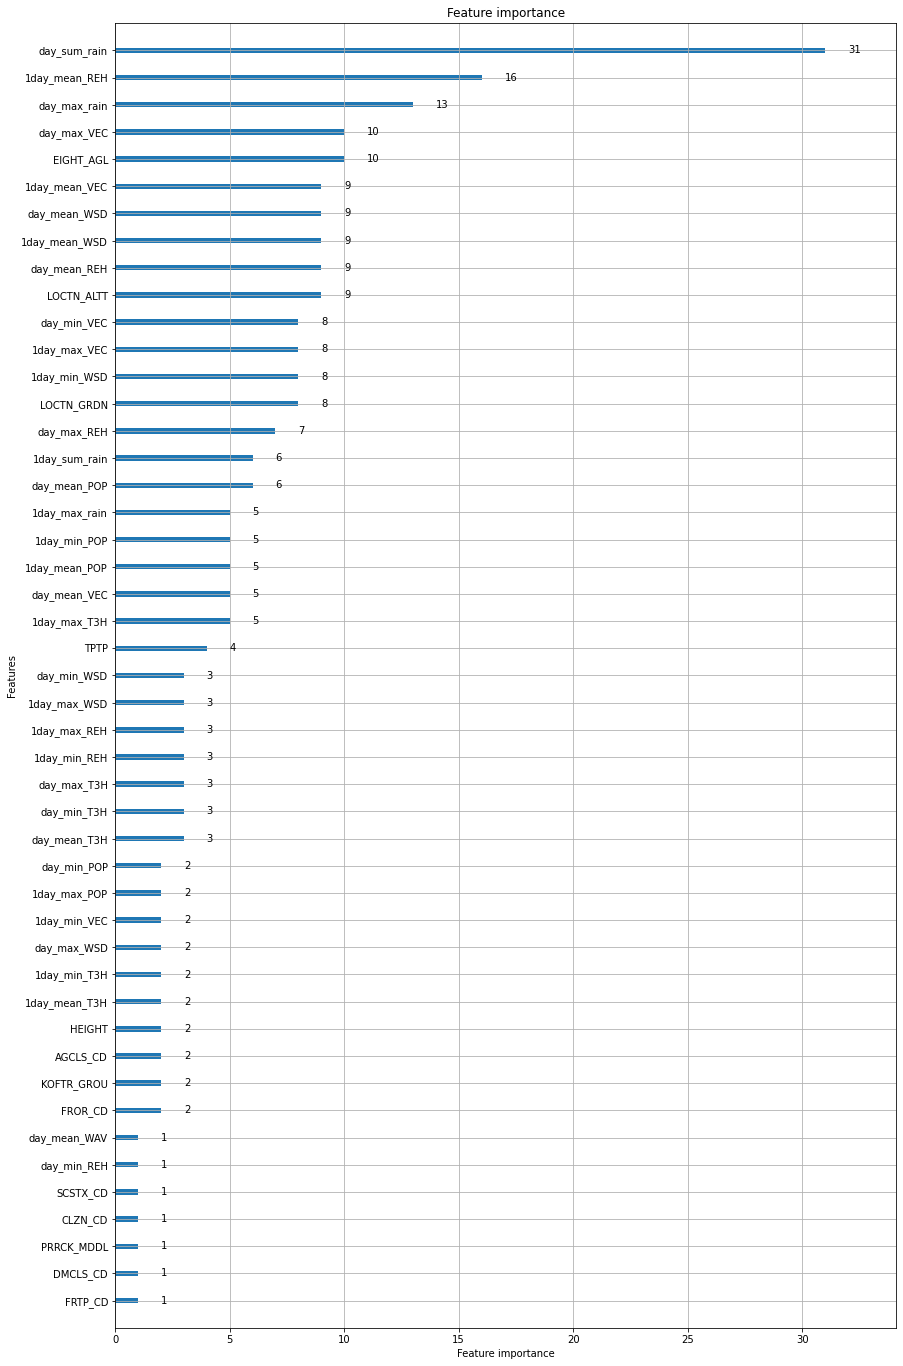

In [67]:
# LIGHTGBM  학습
                       
lgbm10 = LGBMClassifier(n_estimators=300, learning_rate=0.3, num_leaves=34, sumbsample=0.8, colsample_bytree=1.0, max_depth=8,
                             min_child_weight=5.0)
evals = [(X_test10, y_test10)]
lgbm10.fit(X_train10, y_train10, early_stopping_rounds=100, eval_metric='binary_logloss', eval_set=evals, verbose=True)

from lightgbm import plot_importance #  변수 중요도
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(14, 24))
plot_importance(lgbm10, ax=ax)

In [68]:
predictions1 = lgbm1.predict_proba(test_1)[:,1]

In [69]:
predictions2 = lgbm1.predict_proba(test_1)[:,1]

In [70]:
predictions3 = lgbm1.predict_proba(test_1)[:,1]

In [71]:
predictions4 = lgbm1.predict_proba(test_1)[:,1]

In [72]:
predictions5 = lgbm1.predict_proba(test_1)[:,1]

In [73]:
predictions6 = lgbm1.predict_proba(test_1)[:,1]

In [74]:
predictions7 = lgbm1.predict_proba(test_1)[:,1]

In [75]:
predictions8 = lgbm1.predict_proba(test_1)[:,1]

In [76]:
predictions9 = lgbm1.predict_proba(test_1)[:,1]

In [77]:
predictions10 = lgbm1.predict_proba(test_1)[:,1]

In [78]:
preds1 = [ 1 if x > 0.8 else 0 for x in predictions1 ]

In [79]:
preds2 = [ 1 if x > 0.8 else 0 for x in predictions2 ]

In [80]:
preds3 = [ 1 if x > 0.8 else 0 for x in predictions3 ]

In [81]:
preds4 = [ 1 if x > 0.8 else 0 for x in predictions4 ]

In [82]:
preds5 = [ 1 if x > 0.8 else 0 for x in predictions5 ]

In [83]:
preds6 = [ 1 if x > 0.8 else 0 for x in predictions6 ]

In [84]:
preds7 = [ 1 if x > 0.8 else 0 for x in predictions7 ]

In [85]:
preds8 = [ 1 if x > 0.8 else 0 for x in predictions8 ]

In [86]:
preds9 = [ 1 if x > 0.8 else 0 for x in predictions9 ]

In [87]:
preds10 = [ 1 if x > 0.8 else 0 for x in predictions10 ]

In [88]:
lgbm_pred1=pd.DataFrame(preds1, columns= ['col1']) # tab-> lgbm
lgbm_pred2=pd.DataFrame(preds2, columns= ['col2'])
lgbm_pred3=pd.DataFrame(preds3, columns= ['col3'])
lgbm_pred4=pd.DataFrame(preds4, columns= ['col4'])
lgbm_pred5=pd.DataFrame(preds5, columns= ['col5'])

In [89]:
lgbm_pred6=pd.DataFrame(preds6, columns= ['col6'])
lgbm_pred7=pd.DataFrame(preds7, columns= ['col7'])
lgbm_pred8=pd.DataFrame(preds8, columns= ['col8'])
lgbm_pred9=pd.DataFrame(preds9, columns= ['col9'])
lgbm_pred10=pd.DataFrame(preds10, columns= ['col10'])

In [90]:
lgbm_pred1['col1'].value_counts()# tab-> lgbm

0    3394
1      16
Name: col1, dtype: int64

In [91]:
lgbm_pred2['col2'].value_counts()# tab-> lgbm

0    3394
1      16
Name: col2, dtype: int64

In [92]:
lgbm_pred3['col3'].value_counts()# tab-> lgbm

0    3394
1      16
Name: col3, dtype: int64

In [93]:
lgbm_pred4['col4'].value_counts()# tab-> lgbm

0    3394
1      16
Name: col4, dtype: int64

In [94]:
lgbm_pred5['col5'].value_counts()# tab-> lgbm

0    3394
1      16
Name: col5, dtype: int64

In [95]:
lgbm_pred6['col6'].value_counts()# tab-> lgbm

0    3394
1      16
Name: col6, dtype: int64

In [96]:
lgbm_pred7['col7'].value_counts()# tab-> lgbm

0    3394
1      16
Name: col7, dtype: int64

In [97]:
lgbm_pred8['col8'].value_counts()# tab-> lgbm

0    3394
1      16
Name: col8, dtype: int64

In [98]:
lgbm_pred9['col9'].value_counts()# tab-> lgbm

0    3394
1      16
Name: col9, dtype: int64

In [99]:
lgbm_pred10['col10'].value_counts()# tab-> lgbm

0    3394
1      16
Name: col10, dtype: int64

In [100]:
lgbm_pred=lgbm_pred1.join(lgbm_pred2, how= 'inner')  # tab-> lgbm
lgbm_pred=lgbm_pred.join(lgbm_pred3, how= 'inner') 
lgbm_pred=lgbm_pred.join(lgbm_pred4, how= 'inner')
lgbm_pred=lgbm_pred.join(lgbm_pred5, how= 'inner')
lgbm_pred=lgbm_pred.join(lgbm_pred6, how= 'inner')
lgbm_pred=lgbm_pred.join(lgbm_pred7, how= 'inner')
lgbm_pred=lgbm_pred.join(lgbm_pred8, how= 'inner')
lgbm_pred=lgbm_pred.join(lgbm_pred9, how= 'inner')
lgbm_pred=lgbm_pred.join(lgbm_pred10, how= 'inner')
lgbm_pred['sum']=lgbm_pred['col1']+lgbm_pred['col2']+lgbm_pred['col3']+lgbm_pred['col4']+lgbm_pred['col5']+lgbm_pred['col6']+lgbm_pred['col7']+lgbm_pred['col8']+lgbm_pred['col9']+lgbm_pred['col10']

In [101]:
lgbm_pred['1day_yn'] = np.where((lgbm_pred['sum']>=4), 1,0)

In [102]:
lgbm_pred['1day_yn'].value_counts()

0    3394
1      16
Name: 1day_yn, dtype: int64

In [103]:
sub_1=test_id_1.join(lgbm_pred, how= 'inner')

In [104]:
sub_1.to_csv('lgbm_sub1.csv', index=False, encoding='CP949')